## NLP
## Lab 1 - Regular expressions

In [1]:
import os
import regex
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'regex'

Aby ułatwić dalsze przeszukiwanie plików podczas wczytywania wszystkie litery w tekstach zostały zamienione na małe, a wszystkie przerwy między wyrazami zostały zastąpione spacjami.

In [26]:
all_files = []
for filename in os.listdir('./ustawy'):
    with open('./ustawy/' + filename, 'r', encoding='utf-8') as f:
        all_files.append(" ".join(f.read().lower().replace('\n', ' ').split()))

In [27]:
all_files[0]

'dz.u. z 1993 r. nr 129, poz. 599 ustawa z dnia 9 grudnia 1993 r. o zmianie ustawy o podatku od towarów i usług oraz o podatku akcyzowym art. 1. w ustawie z dnia 8 stycznia 1993 r. o podatku od towarów i usług oraz o podatku akcyzowym (dz.u. nr 11, poz. 50 i nr 28, poz. 127) wprowadza się następujące zmiany: 1) w art. 3: a) dotychczasowa treść otrzymuje oznaczenie ust. 1, b) dodaje się ust. 2 w brzmieniu: "2. rada ministrów może określać, w drodze rozporządzenia, towary i usługi, z wyjątkiem wyrobów akcyzowych i wyrobów z metali szlachetnych, do których nie stosuje się przepisów ustawy."; 2) w art. 4: a) w pkt 7 wyrazy "użytkowania wynosi" zastępuje się wyrazami "używania wyniósł", b) w pkt 10 kropkę zastępuje się średnikiem i dodaje wyrazy "w pozostałych przypadkach właściwym urzędem skarbowym jest drugi urząd skarbowy warszawy-śródmieście."; 3) w art. 6: a) ust. 4 otrzymuje brzmienie: "4. jeżeli sprzedaż towaru lub wykonanie usługi powinno być potwierdzone fakturą lub rachunkiem upro

#### Zadanie 1 (Zawiera zadanie 2)

In [28]:
def find_matches(files, pattern):
    matches = [regex.findall(pattern, file) for file in files]
    return [match for matches_in_file in matches for match in matches_in_file]

In [29]:
additions_pattern = '(?<=dodaje się\s)\w+'

In [30]:
set(regex.findall(additions_pattern, all_files[0]))

{'pkt', 'ust', 'wyraz', 'wyrazy', 'zdanie'}

In [31]:
words = find_matches(all_files, additions_pattern)

In [32]:
set(words)

{'2',
 '2a',
 '3',
 '38a',
 '4',
 '5a',
 'art',
 'cyfrę',
 'drugie',
 'dwukropek',
 'dwukrotnie',
 'dział',
 'informację',
 'każdorazowo',
 'kropkę',
 'kwotę',
 'lit',
 'litery',
 'lp',
 'masę',
 'na',
 'nowe',
 'nowy',
 'oddział',
 'odnośnik',
 'określenie',
 'ozna',
 'oznaczenie',
 'pkt',
 'po',
 'poz',
 'pozycję',
 'przecinek',
 'punkt',
 'rozdział',
 'rozdziały',
 'tiret',
 'trzecie',
 'trzykrotnie',
 'tytuł',
 'ust',
 'usta',
 'użyte',
 'użyty',
 'w',
 'wraz',
 'wyraz',
 'wyrazy',
 'zadanie',
 'załącznik',
 'zdania',
 'zdanie',
 'średnik'}

Powyższy zbiór przedstawia wszystkie słowa następujące po wyrażeniu "dodaje się". W zadaniu poszukiwane są wyłącznie miejsca dodania jednostek tekstów prawnych, dlatego został zdefiniowany zbiór słów, który pozwoli znaleźć tylko wyrażenia poprzedzające nazwę lub skrót jednostki.

In [33]:
units = ['tytuł', 'tytuły', 'dział', 'działy', 'rozdział', 'rozdziały', 'oddział', 'oddziały', 'art', 'artykuł', 'artykuły', 'ust', 'ustęp', 'ustępy', 'pkt', 'punkt', 'punkty', 'lit', 'literę', 'litery', 'tiret']

In [34]:
[w for w in set(words) if w in units]

['pkt',
 'art',
 'tiret',
 'tytuł',
 'dział',
 'lit',
 'ust',
 'rozdziały',
 'oddział',
 'punkt',
 'rozdział',
 'litery']

In [35]:
len([word for word in words if word in units])

5958

W danym zbiorze ustaw dodanie jednostki nastąpiło 5958 razy.

Na potrzeby kolejnych zadań zdefiniowane zostało nowe wyrażenie dopasowujące od razu tylko dodania jednostek.

In [36]:
additions_pattern = '(?<=dodaje się\s)({})'.format('|'.join(units))
additions_pattern

'(?<=dodaje się\\s)(tytuł|tytuły|dział|działy|rozdział|rozdziały|oddział|oddziały|art|artykuł|artykuły|ust|ustęp|ustępy|pkt|punkt|punkty|lit|literę|litery|tiret)'

Usuwanie jednostek z aktów prawnych było wykonywane przy użyciu wyrażenia "skreśla się", jednak z czasem zostało zastąpione przez "uchyla się", dlatego poniżej wyszukiwane będą wyrażenia pasujące do obydwu tych form.

In [37]:
removals_pattern1 = '\w+(?=\sskreśla się)'
removals_pattern2 = '\w+(?=\suchyla się)'

In [38]:
words = find_matches(all_files, removals_pattern1) + find_matches(all_files, removals_pattern2)

In [39]:
set(words)

{'1',
 '10',
 '100',
 '102',
 '103a',
 '106a',
 '108',
 '109',
 '11',
 '110',
 '11020',
 '111',
 '113',
 '119',
 '11e',
 '12',
 '121',
 '122',
 '123',
 '124',
 '126',
 '128',
 '129',
 '13',
 '131',
 '132',
 '132a',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '145',
 '146',
 '14a',
 '15',
 '155',
 '159',
 '16',
 '161',
 '162',
 '166',
 '168',
 '168a',
 '17',
 '170',
 '174',
 '175',
 '18',
 '184',
 '188',
 '18b',
 '19',
 '190',
 '191',
 '193',
 '1a',
 '1b',
 '2',
 '20',
 '200',
 '202',
 '207',
 '20a',
 '20b',
 '21',
 '212',
 '214',
 '215',
 '22',
 '221',
 '222',
 '223',
 '223e',
 '229',
 '23',
 '232',
 '234',
 '236',
 '237',
 '238',
 '239',
 '24',
 '24114',
 '24a',
 '24f',
 '25',
 '26',
 '27',
 '28',
 '28a',
 '29',
 '292',
 '293',
 '297',
 '2a',
 '3',
 '30',
 '303',
 '31',
 '32',
 '33',
 '332',
 '34',
 '35',
 '35d',
 '36',
 '362',
 '37',
 '37a',
 '37c',
 '37h',
 '37k',
 '38',
 '38d',
 '39',
 '397',
 '3a',
 '4',
 '40',
 '41',
 '41b',
 '42',
 '43',
 '432',
 '433',
 '43a',
 '43f

W tym przypadku, aby odnaleźć wyłącznie usunięcia jednostek, został stworzony zbiór słów, które mają zostać odrzucone. Pozostawione w zbiorze zostały tylko liczby arabskie i rzymskie oraz liczebniki

In [40]:
excluded_words_removals = ['aplikanta', 'arbitra', 'aresztowaniu', 'bezpodstawnie', 'cywilnym', 'część', 'gdy', 'granicą', 'hodowli', 'jeżeli', 'końcu', 'kropkę', 'kto', 'lub', 'nadal', 'nie', 'odmianę', 'oraz', 'orzekającego', 'postanowienie', 'próby', 'punktu', 'radcowskiego', 'skazany', 'spółdzielni', 'służbowych', 'towarów', 'treść', 'tytule', 'uporczywie', 'ustawy', 'wierzyciel', 'wierzytelności', 'wstępnym', 'wybierania', 'wyrazy', 'zawodowego', 'załączniku', 'zdania', 'zdaniu', 'zmarłego']

In [41]:
words = [word for word in words if word not in excluded_words_removals]
len(words)

1607

W danym zbiorze ustaw usunięcie jednostki nastąpiło 1607 razy.

In [42]:
modifications_pattern = '\w+(?=\sotrzymuje brzmienie)'

In [43]:
words = find_matches(all_files, modifications_pattern)
set(words)

{'1',
 '10',
 '100',
 '1008',
 '100af',
 '100e',
 '100i',
 '101',
 '102',
 '103',
 '1033',
 '103a',
 '104',
 '105',
 '106',
 '106e',
 '106f',
 '106h',
 '106k',
 '107',
 '108',
 '109',
 '10a',
 '10b',
 '10c',
 '10e',
 '10h',
 '10i',
 '11',
 '110',
 '11021',
 '111',
 '111g',
 '111k',
 '111n',
 '112',
 '113',
 '114',
 '114d',
 '115',
 '1150',
 '1152',
 '116',
 '117',
 '117a',
 '118',
 '118c',
 '119',
 '11a',
 '11b',
 '11d',
 '12',
 '120',
 '121',
 '121a',
 '122',
 '122g',
 '123',
 '124',
 '124g',
 '124j',
 '125',
 '126',
 '126a',
 '127',
 '128',
 '129',
 '12a',
 '12b',
 '13',
 '130',
 '131',
 '132',
 '132d',
 '133',
 '135',
 '136',
 '137',
 '138',
 '138a',
 '139',
 '13a',
 '13b',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '144a',
 '145',
 '146',
 '147',
 '147a',
 '148',
 '149',
 '14a',
 '14b',
 '15',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '15a',
 '15b',
 '15c',
 '16',
 '164',
 '165',
 '166b',
 '167',
 '168',
 '168b',
 '169',
 '16a',
 '17',
 '

Analogicznie do poprzedniego zadania, tutaj również zdefiniowany został zbiór słów odrzuconych.

In [44]:
excluded_words_modifications = ['opis', 'podatkowa', 'preambuła', 'społecznych', 'tabeli', 'ustawy', 'wyliczenia', 'załącznik', 'załącznika', 'zdanie', 'średnikiem']

In [45]:
words = [word for word in words if word not in excluded_words_modifications]
len(words)

9356

Zmiana brzmienia jednostki w ustawach wystąpiła 9356 razy.

#### Zadanie 3

Nazwa pliku nie zawsze zawiera rzeczywisty rok wydania ustawy, dlatego rok wyszukiwany będzie na podstawie pierwszego wystąpienia czterocyfrowej liczby po słowach "ustawa z dnia" lub "u s t a w a z dnia", gdyż niemalże wszystkie dokumenty zawierają to wyrażenie.

In [46]:
years = [regex.findall('(?<=ustawa z dnia ).*?[0-9]{4}', file) for file in all_files]
years = [year if year else regex.findall('(?<=u s t a w a z dnia).*?[0-9]{4}', all_files[ind]) for ind, year in enumerate(years)]

In [47]:
years = [(ind, year[0][-4:]) for ind, year in enumerate(years) if len(year)>0]

In [48]:
len(years)

1171

Z całego zbioru 1180 ustaw tylko 9 nie zostało dopasowanych do jednego z dwóch wyrażeń. Nie powinno to jednak znacząco wpłynąć na wyniki procentowe udziałów poszczególnych zmian w ustawach.

In [49]:
files_by_year = {}
for ind, year in years:
    if year in files_by_year:
        files_by_year[year].append(all_files[ind])
    else:
        files_by_year[year] = [all_files[ind]]

In [50]:
statistics = {}
for year, files in files_by_year.items():
    additions = len(find_matches(files, additions_pattern))
    removed = find_matches(files, removals_pattern1) + find_matches(files, removals_pattern2)
    removals = len([word for word in removed if word not in excluded_words_removals])
    modified = find_matches(files, modifications_pattern)
    modifications = len([word for word in modified if word not in excluded_words_modifications])
    statistics[year] = {'Additions': additions, 'Removals': removals, 'Modifications': modifications}

In [51]:
statistics

{'1993': {'Additions': 35, 'Removals': 15, 'Modifications': 63},
 '1994': {'Additions': 83, 'Removals': 23, 'Modifications': 96},
 '2000': {'Additions': 890, 'Removals': 360, 'Modifications': 1431},
 '1998': {'Additions': 484, 'Removals': 229, 'Modifications': 911},
 '1999': {'Additions': 203, 'Removals': 63, 'Modifications': 247},
 '1995': {'Additions': 258, 'Removals': 80, 'Modifications': 344},
 '2001': {'Additions': 1171, 'Removals': 313, 'Modifications': 1442},
 '1997': {'Additions': 420, 'Removals': 143, 'Modifications': 721},
 '1996': {'Additions': 263, 'Removals': 127, 'Modifications': 487},
 '2011': {'Additions': 47, 'Removals': 9, 'Modifications': 93},
 '2006': {'Additions': 65, 'Removals': 12, 'Modifications': 134},
 '2012': {'Additions': 47, 'Removals': 12, 'Modifications': 47},
 '2016': {'Additions': 56, 'Removals': 4, 'Modifications': 71},
 '2008': {'Additions': 38, 'Removals': 11, 'Modifications': 90},
 '2002': {'Additions': 13, 'Removals': 5, 'Modifications': 29},
 '201

In [52]:
statistics_percentage = {}
for year, stats in statistics.items():
    changes_number = stats['Additions'] + stats['Removals'] + stats['Modifications']
    statistics_percentage[year] = {'Additions' : round(stats['Additions']/changes_number*100, 2),
                                  'Removals': round(stats['Removals']/changes_number*100, 2),
                                  'Modifications': round(stats['Modifications']/changes_number*100, 2)}

In [53]:
years = sorted(statistics_percentage)

In [54]:
df = pd.DataFrame({'Additions': [statistics_percentage[year]['Additions'] for year in years],
                   'Removals': [statistics_percentage[year]['Removals'] for year in years],
                   'Modifications': [statistics_percentage[year]['Modifications'] for year in years]})

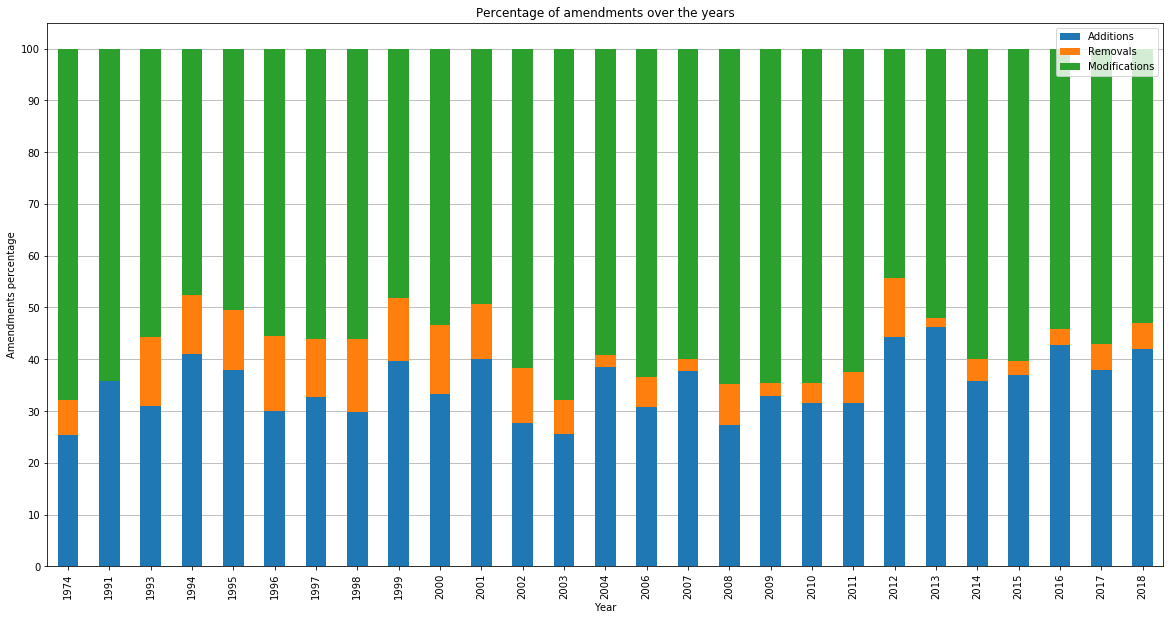

In [55]:
plt.rcParams["figure.figsize"] = [20, 10]
ax = df.plot(kind='bar', stacked=True)
ax.set_axisbelow(True)
ax.grid(axis='y')
plt.xticks(range(len(years)), years)
plt.yticks(np.arange(0,101,10))
plt.xlabel('Year')
plt.ylabel('Amendments percentage')
plt.title('Percentage of amendments over the years')
plt.show()

#### Zadanie 4

In [56]:
word_forms = ['ustawa', 'ustawą', 'ustawę', 'ustawie', 'ustawo', 'ustawy', 'ustawach', 'ustawami', 'ustawom', 'ustaw']

In [57]:
pattern = '({})[^a-zA-Ząę]'.format('|'.join(word_forms))
pattern

'(ustawa|ustawą|ustawę|ustawie|ustawo|ustawy|ustawach|ustawami|ustawom|ustaw)[^a-zA-Ząę]'

In [58]:
all_occurences = find_matches(all_files, pattern)
len(all_occurences)

25102

Słowo "ustawa" w jakiejkolwiek z form fleksyjnych pojawia się w zbiorze 25102 razy.

#### Zadanie 5

In [59]:
pattern = '({})[^a-zA-Ząę](?=z dnia)'.format('|'.join(word_forms))
pattern

'(ustawa|ustawą|ustawę|ustawie|ustawo|ustawy|ustawach|ustawami|ustawom|ustaw)[^a-zA-Ząę](?=z dnia)'

In [60]:
followed_occurences = find_matches(all_files, pattern)
len(followed_occurences)

8639

Słowo "ustawa" w różnych formach poprzedza wyrażenie "z dnia" 8639 razy.

#### Zadanie 6

In [61]:
pattern = '({})[^a-zA-Ząę](?!z dnia)'.format('|'.join(word_forms))
pattern

'(ustawa|ustawą|ustawę|ustawie|ustawo|ustawy|ustawach|ustawami|ustawom|ustaw)[^a-zA-Ząę](?!z dnia)'

In [62]:
not_followed_occurences = find_matches(all_files, pattern)
len(not_followed_occurences)

16463

Słowo "ustawa" w różnych formach nie poprzedza wyrażenia "z dnia" 16463 razy.

8639 + 16463 = 25102   => wyniki zadań 4,5 i 6 są zgodne.

#### Zadanie 7

In [63]:
pattern = '({})[^a-zA-Ząę](?!o zmianie)'.format('|'.join(word_forms))
pattern

'(ustawa|ustawą|ustawę|ustawie|ustawo|ustawy|ustawach|ustawami|ustawom|ustaw)[^a-zA-Ząę](?!o zmianie)'

In [64]:
not_followed_by_change = find_matches(all_files, pattern)
len(not_followed_by_change)

25068

Słowo "ustawa" nie poprzedza wyrażenia "o zmianie" w 25068 z 25102 przypadków.

#### Zadanie 8

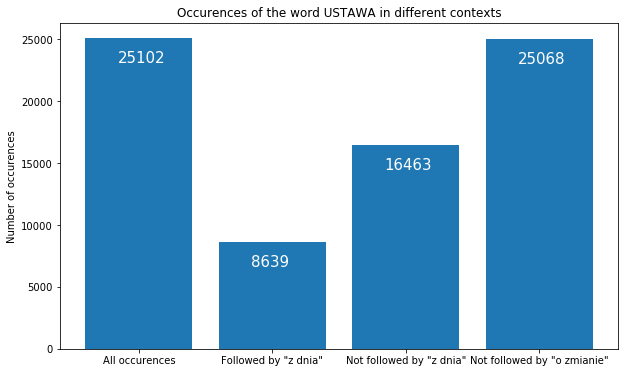

In [65]:
data = [len(all_occurences), len(followed_occurences), len(not_followed_occurences), len(not_followed_by_change)]
xticks = ['All occurences', 'Followed by "z dnia"', 'Not followed by "z dnia"', 'Not followed by "o zmianie"']
plt.rcParams["figure.figsize"] = [10, 6]
plt.title('Occurences of the word USTAWA in different contexts')
plt.bar([i for i in range(4)], data)
for i in range(4):
    plt.annotate(data[i], (i-0.16, data[i]-2000), color='white', size=15)
plt.xticks(range(len(xticks)), xticks)
plt.ylabel('Number of occurences')
plt.show()